In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from  scipy.stats import f_oneway
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
accidents =  pd.read_csv('accident_data.csv')

In [3]:
accidents.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [4]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
category_col =['Index','Accident_Severity','Accident Date','Light_Conditions','District Area','Road_Surface_Conditions','Road_Type'
              ,'Urban_or_Rural_Area','Weather_Conditions','Vehicle_Type',]


for col in category_col:
    accidents[col] = accidents[col].astype('category')

print(accidents.dtypes)

Index                      category
Accident_Severity          category
Accident Date              category
Latitude                    float64
Light_Conditions           category
District Area              category
Longitude                   float64
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object


In [6]:
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], dayfirst = True, errors = 'coerce')

In [7]:
accidents['year']= accidents['Accident Date'].dt.year
accidents['month']= accidents['Accident Date'].dt.month
accidents['day']= accidents['Accident Date'].dt.day
accidents['DayofWeek']=accidents['Accident Date'].dt.dayofweek

<H1>FILLING UP NULL VALUES</H1>

In [8]:
accidents['Accident Date'] = accidents['Accident Date'].fillna(accidents['Accident Date'].mode()[0])
accidents['Latitude'] = accidents['Latitude'].fillna(accidents['Latitude'].mode()[0])
accidents['Longitude'] = accidents['Longitude'].fillna(accidents['Longitude'].mode()[0])
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].fillna(accidents['Road_Surface_Conditions'].mode()[0])
accidents['Road_Type'] = accidents['Road_Type'].fillna(accidents['Road_Type'].mode()[0])
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].fillna(accidents['Urban_or_Rural_Area'].mode()[0])
accidents.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date                   0
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions          14128
Vehicle_Type                    0
year                       395672
month                      395672
day                        395672
DayofWeek                  395672
dtype: int64

In [9]:
accidents.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
year                              float64
month                             float64
day                               float64
DayofWeek                         float64
dtype: object

In [10]:
accidents.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date                   0
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions          14128
Vehicle_Type                    0
year                       395672
month                      395672
day                        395672
DayofWeek                  395672
dtype: int64

<h1>Q1: WHAT IS THE DISTRICT WITH THE HIGHEST NUMBER OF CASUALTIES?</h1>

In [11]:
district_casualties = accidents.groupby('District Area')['Number_of_Casualties'].sum()
district_casualties

District Area
Aberdeen City    1508
Aberdeenshire    2529
Adur              817
Allerdale        1663
Alnwick           351
                 ... 
Wychavon         1943
Wycombe          2442
Wyre             1706
Wyre Forest      1340
York             2453
Name: Number_of_Casualties, Length: 422, dtype: int64

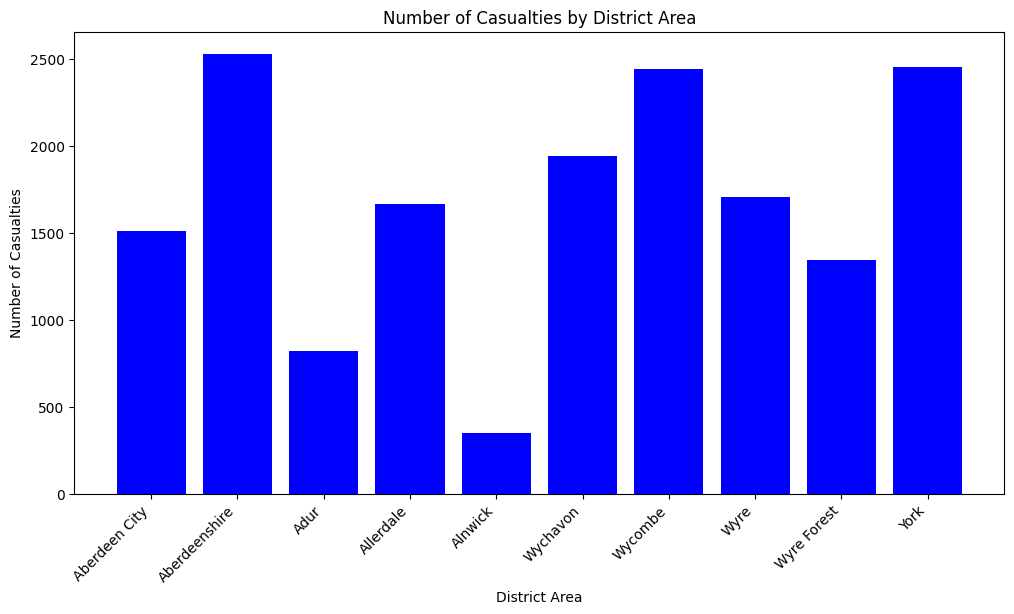

In [12]:

districts = [
    'Aberdeen City', 'Aberdeenshire', 'Adur', 'Allerdale', 'Alnwick', 'Wychavon', 
    'Wycombe', 'Wyre', 'Wyre Forest', 'York'
]
casualties = [1508, 2529, 817, 1663, 351, 1943, 2442, 1706, 1340, 2453]


plt.figure(figsize=(12, 6))
plt.bar(districts, casualties, color='blue')
plt.xlabel('District Area')
plt.ylabel('Number of Casualties')
plt.title('Number of Casualties by District Area')
plt.xticks(rotation=45, ha='right')
plt.show()


<h1>insight1.1:Aberdeenshire has the highest number of casualties</h1>

<h1>insight2: what is the number of casualties in  aberdeenshire</h1>

In [13]:
aberdeenshire_casualties = district_casualties['Aberdeenshire']
print(aberdeenshire_casualties)


2529


<H1>ANS:Aberdeenshire has the highest number of casualties with 2529.</H1>

<H1>Q2:What is the distribution of Accident_Severity? </H1>

In [14]:
accidents['Accident_Severity'].value_counts()


Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

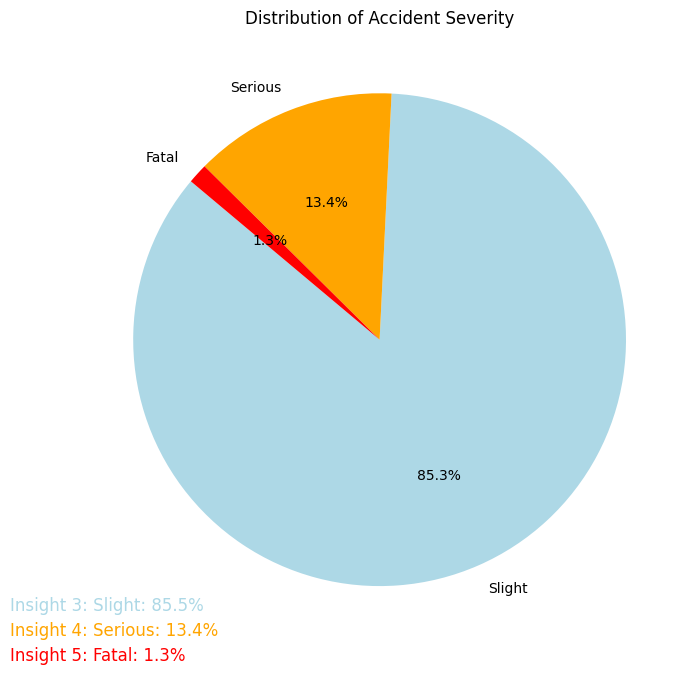

In [15]:

labels = ['Slight', 'Serious', 'Fatal']
sizes = [563801, 88217, 8661]
percentages = [85.5, 13.4, 1.3]
colors = ['lightblue', 'orange', 'red']


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Accident Severity')


plt.text(-1.5, -1.1, 'Insight 3: Slight: 85.5%', fontsize=12, color='lightblue')
plt.text(-1.5, -1.2, 'Insight 4: Serious: 13.4%', fontsize=12, color='orange')
plt.text(-1.5, -1.3, 'Insight 5: Fatal: 1.3%', fontsize=12, color='red')

plt.show()


<h1>insight3: Slight: 85.5% </h1>
<h1>insight4: Serious: 13.4% </h1>
<h1>insight5: Fatal: 1.3% </h1>
<h1>overall, slights severity have the highest percentage in accident severity</h1>

<h1>Q3:How often do different Light_Conditions occur in accidents?</h1>

In [16]:
accidents['Light_Conditions'].value_counts()


Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

Text(0.5, 1.0, 'Percentage of Accidents by Light Conditions')

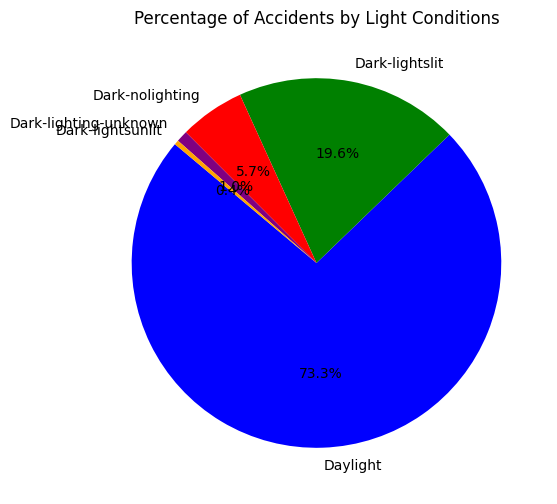

In [17]:
import matplotlib.pyplot as plt

light_conditions = ['Daylight', 'Dark-lightslit', 'Dark-nolighting', 'Dark-lighting-unknown', 'Dark-lightsunlit']
accidents_percentage = [73.4, 19.6, 5.7, 1.0, 0.4]
colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(10, 6))
plt.pie(accidents_percentage, labels=light_conditions, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Accidents by Light Conditions')

<h1>insight6: 73.4 percent of accident happen on daylight</h1>
<h1>insight7: 19.6 percent of accident happen on Darkness - lights lit</h1>
<h1>insight8: 5.7 percent of accident happen on Darkness - no lighting</h1>
<h1>insight9: 1.0 percent of accident happen on Darkness - lighting unknown</h1>
<h1>insight10: 0.4 percent of accident happen on Darkness - lights unlit</h1>

<h1>Q4:number of accidents during weather conditions</h1>

In [18]:
accidents['Weather_Conditions'].value_counts()


Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

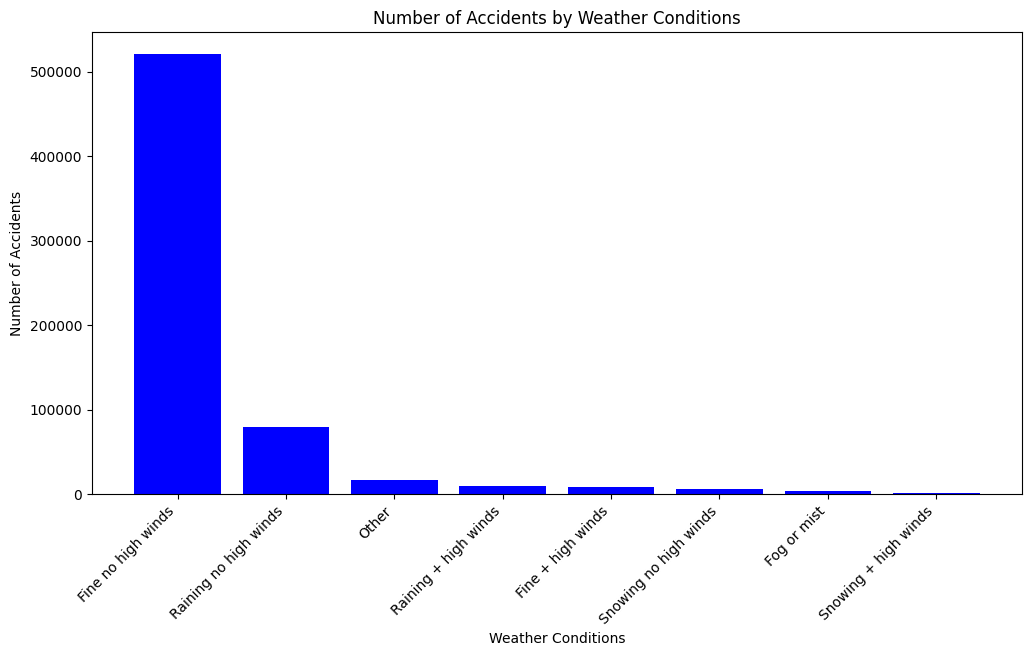

In [19]:

weather_conditions = ['Fine no high winds', 'Raining no high winds', 'Other', 'Raining + high winds', 'Fine + high winds', 'Snowing no high winds', 'Fog or mist', 'Snowing + high winds']
accidents_count = [520885, 79696, 17150, 9615, 8554, 6238, 3528, 885]

plt.figure(figsize=(12, 6))
plt.bar(weather_conditions, accidents_count, color='blue')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Weather Conditions')
plt.xticks(rotation=45, ha='right')
plt.show()


<H1>INSIGHT11: Fine no high winds: 520885 or 81.7%</H1>
<H1>INSIGHT12: Raining no high winds:79696 or 12.5%</H1>
<H1>INSIGHT13: Other: 17150 or 2.7%</H1>
<H1>INSIGHT14: Raining + high winds: 9615 or 1.5%</H1>
<H1>INSIGHT15: Fine + high winds: 8554 or 1.3%</H1>
<H1>INSIGHT 16:Fog or mist: 3528 or  0.6%</H1>
<H1>INSIGHT 17:Snowing + high winds: 885 or 0.1%</H1>
<H2>basically, accidents happens on a sunny day weather conditions</H2>

<h1>Q5:How does Road_Type affect the number of Number_of_Casualties?</h1>

In [20]:
accidents.groupby('Road_Type')['Number_of_Casualties'].mean()


Road_Type
Dual carriageway      1.477279
One way street        1.192713
Roundabout            1.274891
Single carriageway    1.343788
Slip road             1.423661
Name: Number_of_Casualties, dtype: float64

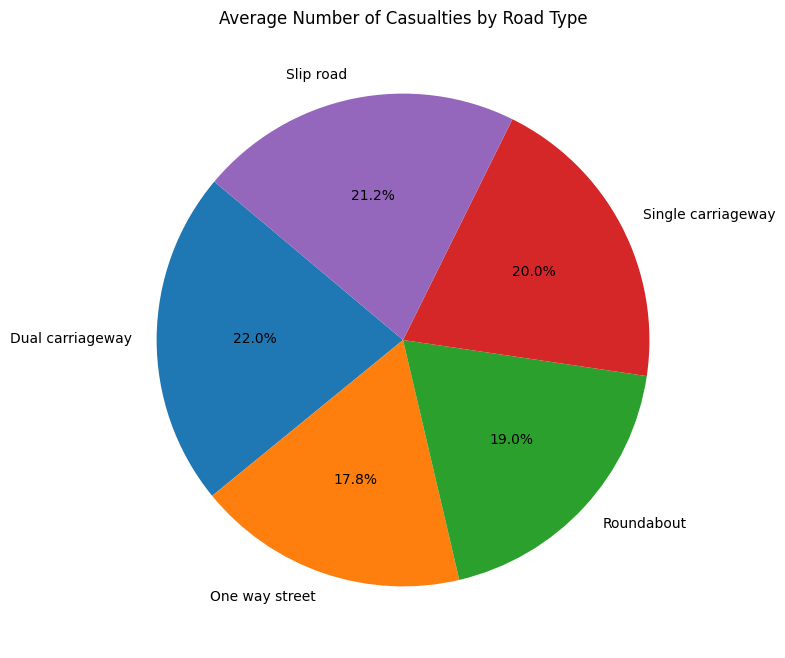

In [21]:
import matplotlib.pyplot as plt

# Data
road_types = ['Dual carriageway', 'One way street', 'Roundabout', 'Single carriageway', 'Slip road']
casualties_mean = [1.477279, 1.192713, 1.274891, 1.343788, 1.423661]


plt.figure(figsize=(8, 8))
plt.pie(casualties_mean, labels=road_types, autopct='%1.1f%%', startangle=140)
plt.title('Average Number of Casualties by Road Type')
plt.show()


<h1>Insight:18
    
Different road types have varying impacts on the average number of casualties. 

Dual carriageway: Average number of casualties is 1.477279, which is the highest among the road types listed.

Slip road: Average number of casualties is 1.423661, slightly lower than dual carriageways.

Single carriageway: Average number of casualties is 1.343788.

Roundabout: Average number of casualties is 1.274891.

 INSIGHT One way street: Average number of casualties is 1.192713, which is the lowest among the road types listed.</h1>

<h1>Q6:How do Light_Conditions affect the Number_of_Casualties?</h1>

In [22]:
accidents.groupby('Light_Conditions')['Number_of_Casualties'].mean()


Light_Conditions
Darkness - lighting unknown    1.306447
Darkness - lights lit          1.369374
Darkness - lights unlit        1.331105
Darkness - no lighting         1.541657
Daylight                       1.340309
Name: Number_of_Casualties, dtype: float64

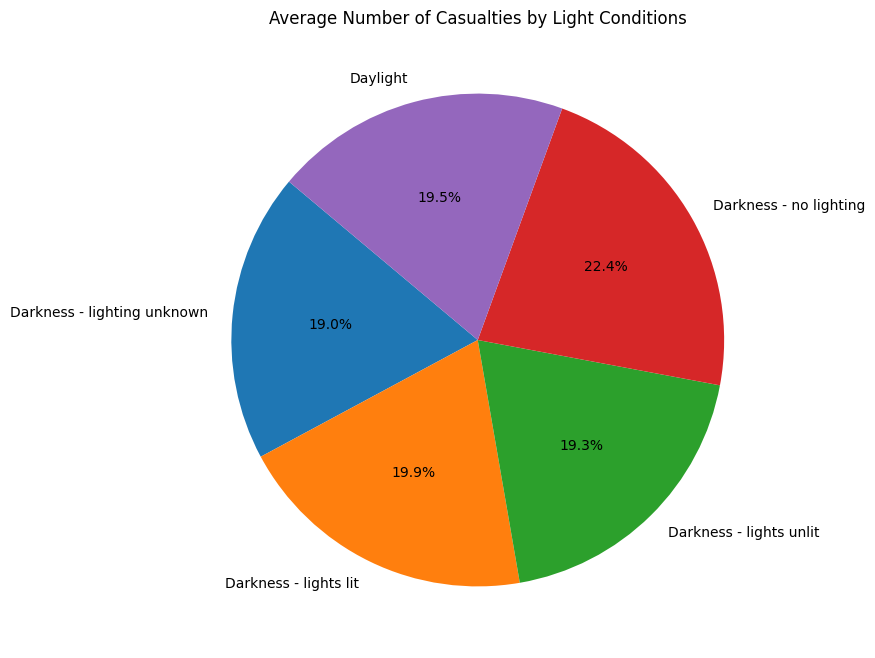

In [23]:

light_conditions = [
    'Darkness - lighting unknown', 'Darkness - lights lit', 'Darkness - lights unlit', 
    'Darkness - no lighting', 'Daylight'
]
casualties_mean = [1.306447, 1.369374, 1.331105, 1.541657, 1.340309]

plt.figure(figsize=(8, 8))
plt.pie(casualties_mean, labels=light_conditions, autopct='%1.1f%%', startangle=140)
plt.title('Average Number of Casualties by Light Conditions')
plt.show()



<h1>INSIGHT19:
No Lighting: The most dangerous, with the highest average casualties.

Lights Lit: Still dangerous at night, even with streetlights.

Lights Unlit: Slightly safer than lit lights, but still risky.

Daylight: Safer than nighttime, with fewer casualties.

Unknown Lighting: Least average casualties, but data might not be reliable.</h1>


<h1>Q7:How do Weather_Conditions, Light_Conditions, and Accident_Severity interact?</h1>


In [24]:
accidents.groupby(['Weather_Conditions', 'Light_Conditions'])['Number_of_Casualties'].mean()


Weather_Conditions     Light_Conditions           
Fine + high winds      Darkness - lighting unknown    1.389831
                       Darkness - lights lit          1.373110
                       Darkness - lights unlit        1.470588
                       Darkness - no lighting         1.523869
                       Daylight                       1.370428
Fine no high winds     Darkness - lighting unknown    1.331252
                       Darkness - lights lit          1.366880
                       Darkness - lights unlit        1.324118
                       Darkness - no lighting         1.560301
                       Daylight                       1.333901
Fog or mist            Darkness - lighting unknown    1.369231
                       Darkness - lights lit          1.436482
                       Darkness - lights unlit        1.297297
                       Darkness - no lighting         1.469838
                       Daylight                       1.460134
Othe

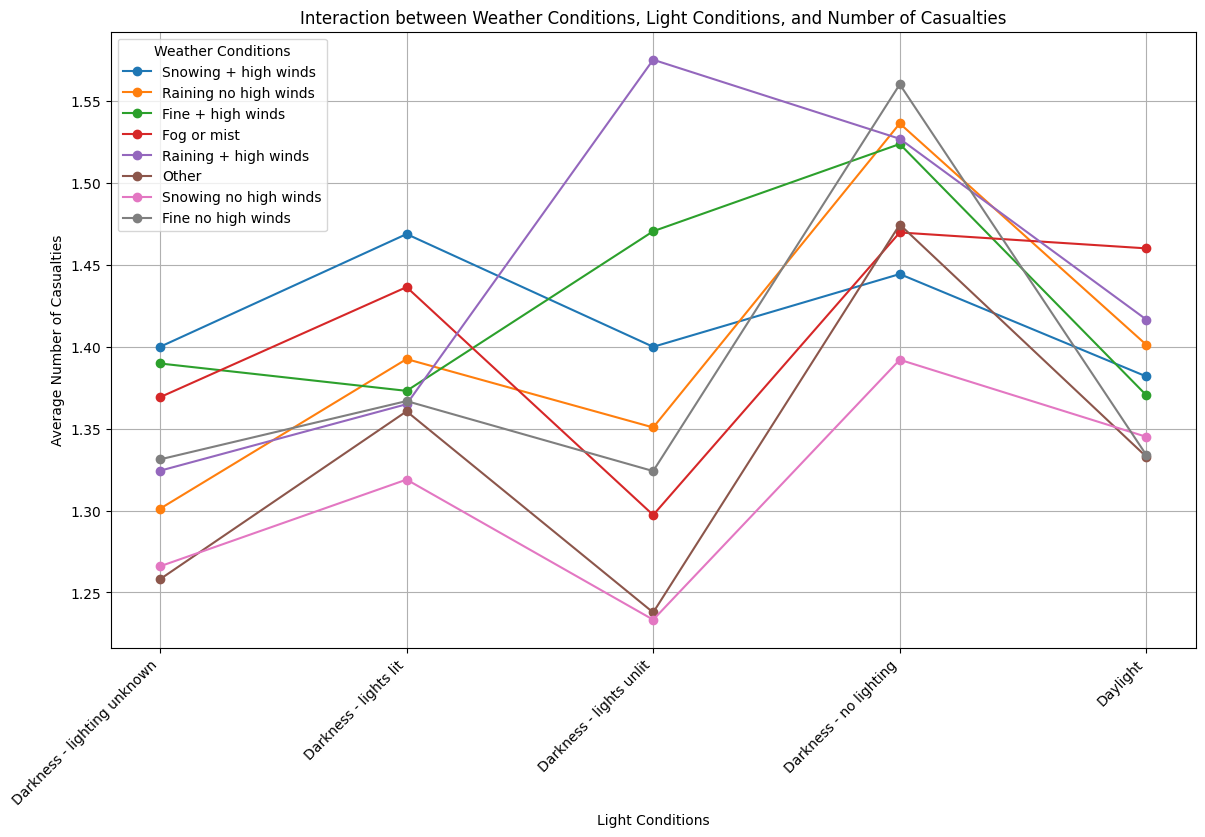

In [25]:
import matplotlib.pyplot as plt


weather_conditions = [
    'Fine + high winds', 'Fine + high winds', 'Fine + high winds', 'Fine + high winds', 'Fine + high winds',
    'Fine no high winds', 'Fine no high winds', 'Fine no high winds', 'Fine no high winds', 'Fine no high winds',
    'Fog or mist', 'Fog or mist', 'Fog or mist', 'Fog or mist', 'Fog or mist',
    'Other', 'Other', 'Other', 'Other', 'Other',
    'Raining + high winds', 'Raining + high winds', 'Raining + high winds', 'Raining + high winds', 'Raining + high winds',
    'Raining no high winds', 'Raining no high winds', 'Raining no high winds', 'Raining no high winds', 'Raining no high winds',
    'Snowing + high winds', 'Snowing + high winds', 'Snowing + high winds', 'Snowing + high winds', 'Snowing + high winds',
    'Snowing no high winds', 'Snowing no high winds', 'Snowing no high winds', 'Snowing no high winds', 'Snowing no high winds'
]
light_conditions = [
    'Darkness - lighting unknown', 'Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting', 'Daylight',
    'Darkness - lighting unknown', 'Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting', 'Daylight',
    'Darkness - lighting unknown', 'Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting', 'Daylight',
    'Darkness - lighting unknown', 'Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting', 'Daylight',
    'Darkness - lighting unknown', 'Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting', 'Daylight',
    'Darkness - lighting unknown', 'Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting', 'Daylight',
    'Darkness - lighting unknown', 'Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting', 'Daylight',
    'Darkness - lighting unknown', 'Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting', 'Daylight'
]
casualties_mean = [
    1.389831, 1.373110, 1.470588, 1.523869, 1.370428,
    1.331252, 1.366880, 1.324118, 1.560301, 1.333901,
    1.369231, 1.436482, 1.297297, 1.469838, 1.460134,
    1.258065, 1.360608, 1.237762, 1.474674, 1.332871,
    1.324324, 1.364971, 1.575342, 1.527056, 1.416633,
    1.301127, 1.392526, 1.350763, 1.536405, 1.401230,
    1.400000, 1.468880, 1.400000, 1.444444, 1.381898,
    1.265957, 1.318928, 1.233333, 1.392109, 1.345036
]


plt.figure(figsize=(14, 8))
for wc in set(weather_conditions):
    indices = [i for i, x in enumerate(weather_conditions) if x == wc]
    plt.plot(
        [light_conditions[i] for i in indices],
        [casualties_mean[i] for i in indices],
        marker='o',
        linestyle='-',
        label=wc
    )

plt.xlabel('Light Conditions')
plt.ylabel('Average Number of Casualties')
plt.title('Interaction between Weather Conditions, Light Conditions, and Number of Casualties')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Weather Conditions')
plt.grid(True)
plt.show()


<H1>
INSIGHTS20:
Fine Weather (High Winds/No High Winds):
    
Daylight: Generally results in fewer casualties.

DaRkness - No Lighting: Highest casualties, especially without lighting.

Daylight: Fewer casualties compared to night.

Darkness - Lights Unlit: Lowest casualties within foggy conditions.

Darkness - No Lighting: Higher casualties.

Daylight: Safer with fewer casualties.

Raining (With/Without High Winds):

DaylighT: Slightly fewer casualties.

Darkness - No Lighting: Higher casualties.

Snowing (With/Without High Winds):
|
</H1>

<h1>Q8:Does light Conditions and Weather Conditions affects the Severity of an accidents in year 2019</h1>

In [30]:
accidents_2019 = accidents[accidents['year'] == 2019]
affects_l_condition_severity_2019 = accidents_2019.groupby(['Weather_Conditions', 'Light_Conditions'])['Accident_Severity'].value_counts()
print(affects_l_condition_severity_2019)

Weather_Conditions     Light_Conditions             Accident_Severity
Fine + high winds      Darkness - lighting unknown  Slight                 8
                                                    Serious                1
                                                    Fatal                  0
                       Darkness - lights lit        Slight               283
                                                    Serious               55
                                                                        ... 
Snowing no high winds  Darkness - no lighting       Serious                5
                                                    Fatal                  0
                       Daylight                     Slight               216
                                                    Serious               23
                                                    Fatal                  1
Name: count, Length: 120, dtype: int64


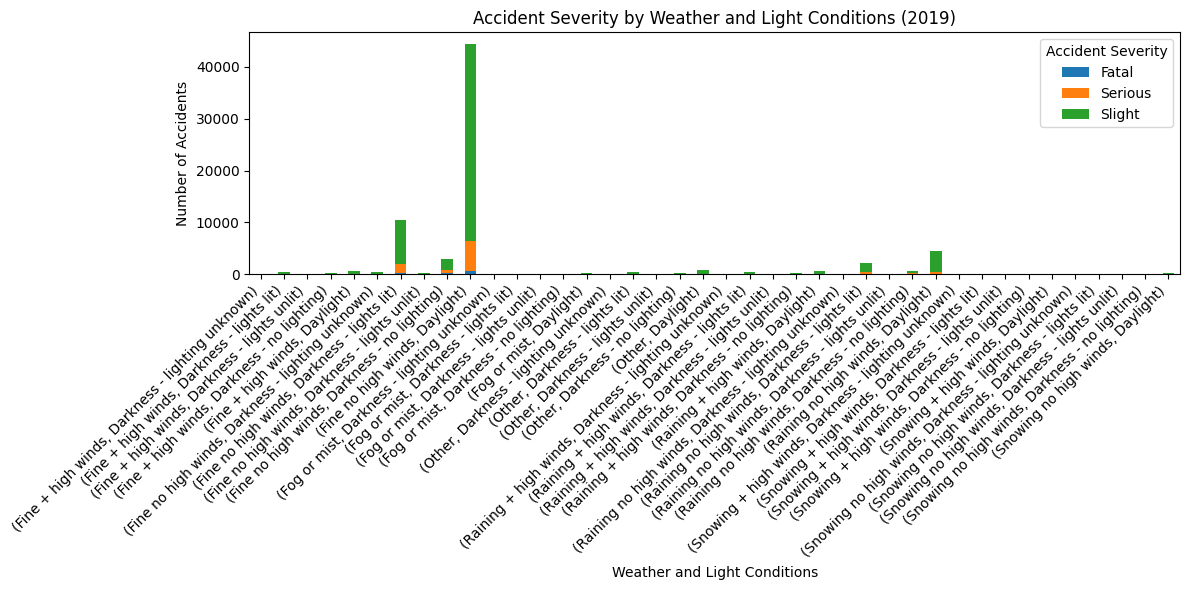

In [31]:

data = affects_l_condition_severity_2019.unstack() 
data.plot(kind='bar', figsize=(12, 6), stacked=True)

# Customize the plot
plt.title("Accident Severity by Weather and Light Conditions (2019)")
plt.xlabel("Weather and Light Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha='right')  
plt.legend(title="Accident Severity")
plt.tight_layout()


plt.show()


<h1>INSIGHTS21:
    Fine + High Winds:

Darkness - lighting unknown: Most accidents are slight, with a few serious and fatal.


Darkness - lights lit: Higher number of slight accidents, followed by serious accidents.

Snowing No High Winds:

Darkness - no lighting: Higher number of serious accidents and some fatal accidents.

Daylight: Most accidents are slight, followed by serious and a few fatal.</h1>

<h1>Q9:What is the distribution of accidents based on Accident_Severity?</h1>

In [32]:
accident_severity_distribution = accidents['Accident_Severity'].value_counts()
print(accident_severity_distribution)

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64


<H1> INSIGHTS22:
distribution of accidents based on severity in percentage:
Slight: 563,801 accidents (87.02%)

Serious: 88,217 accidents (13.63%)

Fatal: 8,661 accidents (1.34%)</H1>

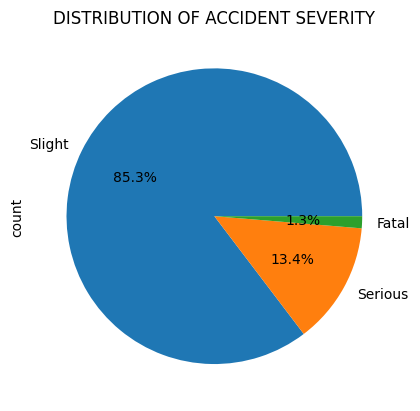

In [33]:
accident_severity_distribution.plot(kind='pie', autopct= '%1.1f%%')
plt.title('DISTRIBUTION OF ACCIDENT SEVERITY')

plt.show()


<h1>Q10:What is the average number of casualties per year?</h1>

In [37]:
average_casualties_per_year = accidents.groupby('year')['Number_of_Casualties'].mean()
print(average_casualties_per_year)


year
2019.0    1.358092
2020.0    1.349002
2021.0    1.351115
2022.0    1.349934
Name: Number_of_Casualties, dtype: float64


<H1>Insight23: The average number of casualties per accident remains relatively consistent over the years. In 2019, it was approximately 1.3581, followed by a slight decrease in 2020 (1.3490), a slight increase in 2021 (1.3511), and a near-identical value in 2022 (1.3499). The overall average across these years aligns closely with 1.3570 casualties per accident, translating to 16.96%.</H1>

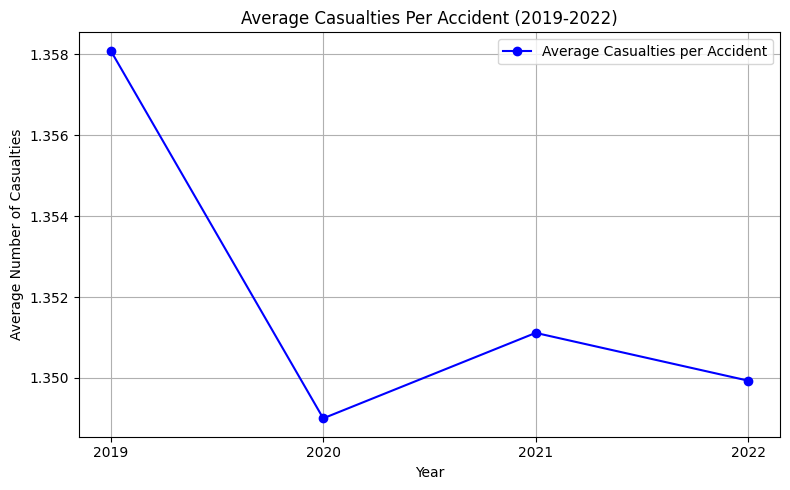

In [38]:

years = [2019, 2020, 2021, 2022]
average_casualties = [1.358092, 1.349002, 1.351115, 1.349934]
plt.figure(figsize=(8, 5))
plt.plot(years, average_casualties, marker='o', linestyle='-', color='blue', label="Average Casualties per Accident")

plt.title("Average Casualties Per Accident (2019-2022)")
plt.xlabel("Year")
plt.ylabel("Average Number of Casualties")
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h1>Q11:What is the most common Vehicle_Type involved in accidents?</h1>

In [39]:
vehicle_type_distribution = accidents['Vehicle_Type'].value_counts()


print(vehicle_type_distribution)

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64


<H1>insight24:</H1>
<h1>Cars Everywhere: No surprise here—cars are involved in the most accidents. With 497,992 incidents, it looks like cars are the biggest culprits on the road.</h1>
<h1>Bikes and Big Trucks: Motorcycles and big trucks are also pretty accident-prone. Motorcycles over 500cc and heavy goods vehicles seem to have a knack for getting into accidents. Maybe it's their size, speed, or just bad luck.</h1>
<h1>Rarely Seen on the Accident List: Some vehicles, like ridden horses 4 accidents and pedal cycles 197 accidents, hardly ever show up in accident stats. Probably because there aren't too many of them on the roads.</h1>
<h1>Passenger Vehicles: Buses and minibuses have their fair share of accidents too . So, it’s crucial to keep safety top of mind for these passenger vehicles—make sure drivers are well-trained, and the vehicles are in good shape.</h1>

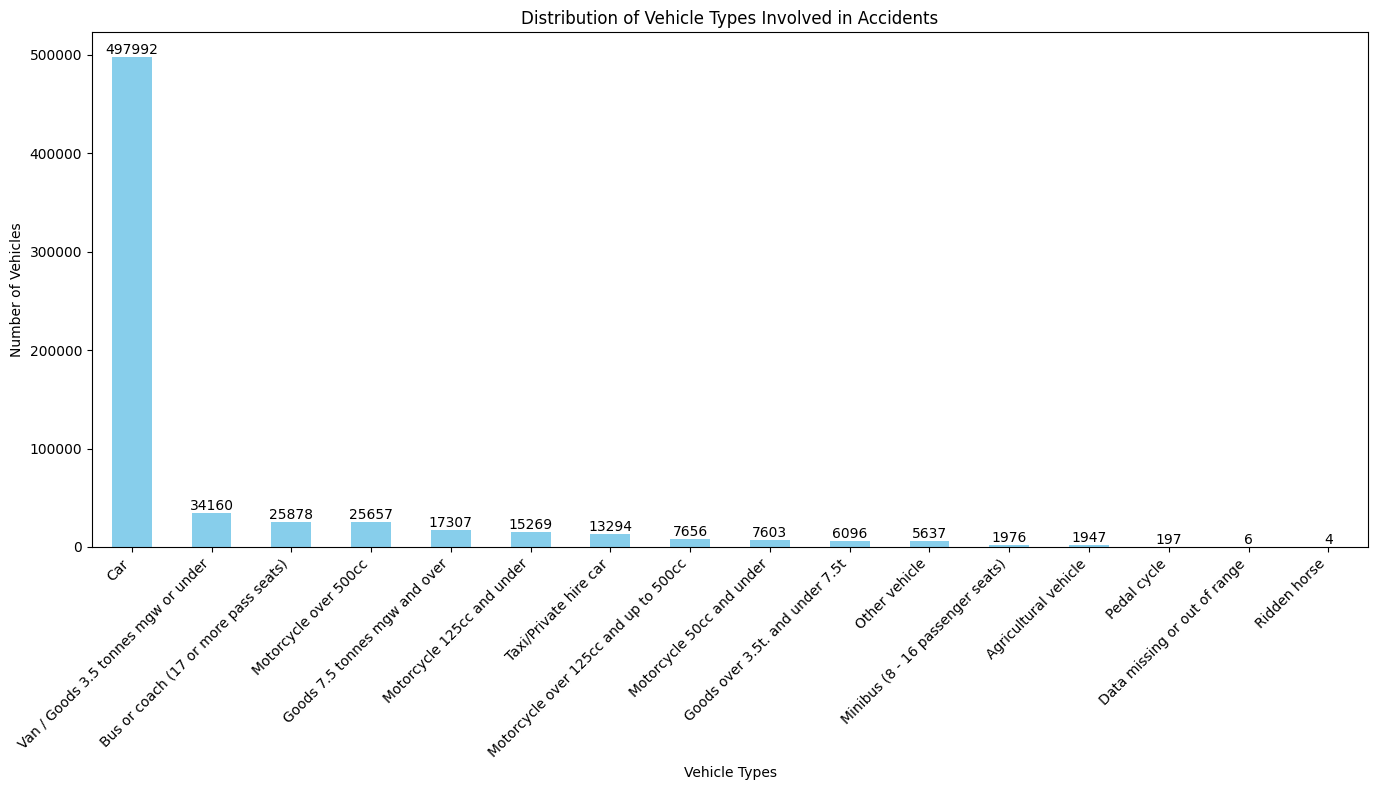

In [41]:
import matplotlib.pyplot as plt

vehicle_type_distribution.plot(kind='bar', color='skyblue', figsize=(14, 8))
plt.title('Distribution of Vehicle Types Involved in Accidents')
plt.xlabel('Vehicle Types')
plt.ylabel('Number of Vehicles')

for index, value in enumerate(vehicle_type_distribution):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



<h1>I didnt use any scatter plots for my insights cuz its not applicable for the insights that i have 
</h1>